In [64]:
'''
Add imports her as they are required
'''

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import joblib

In [65]:
dfwifi = pd.read_csv('ncounter.csv', delimiter = ';')

In [72]:
dfdevices = dfwifi[['dev_id', 'name', 'location']]
dfdevices = dfdevices.drop_duplicates()
dfdevices.to_csv('devices.csv')

In [35]:
display(dfwifi.head())
print(dfwifi.shape)
display(dfwifi.info())

,dev_id,name,date,total,left,left_avg,year,month,dayofweek,day,hour,location,updatetime
0,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,27.0,14.0,1.0,2019.0,Jan,Thursday,3.0,4.0,"-38.1474393,144.3576924",2020-11-26T10:53:15.867000+10:00
1,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,33.0,13.0,1.0,2019.0,Jan,Thursday,3.0,4.0,"-38.1474393,144.3576924",2020-11-26T10:53:15.871000+10:00
2,hawk-013a51,Myer South side,2019-01-03T14:33:20+10:00,72.0,23.0,1.0,2019.0,Jan,Thursday,3.0,4.0,"-38.14762,144.3622749",2020-11-26T10:53:15.877000+10:00
3,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,16.0,14.0,1.0,2019.0,Jan,Thursday,3.0,4.0,"-38.1469395,144.3599357",2020-11-26T10:53:15.879000+10:00
4,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,19.0,10.0,3.0,2019.0,Jan,Thursday,3.0,4.0,"-38.1469395,144.3599357",2020-11-26T10:53:15.882000+10:00


(1230769, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230769 entries, 0 to 1230768
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   dev_id      1079034 non-null  object 
 1   name        964576 non-null   object 
 2   date        1055282 non-null  object 
 3   total       1230609 non-null  float64
 4   left        1230609 non-null  float64
 5   left_avg    1230609 non-null  float64
 6   year        1055282 non-null  float64
 7   month       1055282 non-null  object 
 8   dayofweek   1055282 non-null  object 
 9   day         1055282 non-null  float64
 10  hour        1055282 non-null  float64
 11  location    964576 non-null   object 
 12  updatetime  1230769 non-null  object 
dtypes: float64(6), object(7)
memory usage: 122.1+ MB


None

In [36]:
'''
Given the current weather data collected, I'm only going to include wifi counts for 2019
'''

dfwifi = dfwifi[dfwifi['year'] == 2019.0]

In [37]:
display(dfwifi.head())
print(dfwifi.shape)
display(dfwifi.info())

,dev_id,name,date,total,left,left_avg,year,month,dayofweek,day,hour,location,updatetime
0,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,27.0,14.0,1.0,2019.0,Jan,Thursday,3.0,4.0,"-38.1474393,144.3576924",2020-11-26T10:53:15.867000+10:00
1,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,33.0,13.0,1.0,2019.0,Jan,Thursday,3.0,4.0,"-38.1474393,144.3576924",2020-11-26T10:53:15.871000+10:00
2,hawk-013a51,Myer South side,2019-01-03T14:33:20+10:00,72.0,23.0,1.0,2019.0,Jan,Thursday,3.0,4.0,"-38.14762,144.3622749",2020-11-26T10:53:15.877000+10:00
3,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,16.0,14.0,1.0,2019.0,Jan,Thursday,3.0,4.0,"-38.1469395,144.3599357",2020-11-26T10:53:15.879000+10:00
4,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,19.0,10.0,3.0,2019.0,Jan,Thursday,3.0,4.0,"-38.1469395,144.3599357",2020-11-26T10:53:15.882000+10:00


(361974, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 361974 entries, 0 to 1067740
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   dev_id      283335 non-null  object 
 1   name        267466 non-null  object 
 2   date        361974 non-null  object 
 3   total       361974 non-null  float64
 4   left        361974 non-null  float64
 5   left_avg    361974 non-null  float64
 6   year        361974 non-null  float64
 7   month       361974 non-null  object 
 8   dayofweek   361974 non-null  object 
 9   day         361974 non-null  float64
 10  hour        361974 non-null  float64
 11  location    267466 non-null  object 
 12  updatetime  361974 non-null  object 
dtypes: float64(6), object(7)
memory usage: 38.7+ MB


None

In [38]:
'''
There is no way to impute missing device names, location names or location coordinates.

Looking at these features:

location: it is unlikely that we will use the gps locations, all locations are within a small radius of the cbd and most locations are within about a 3km radius of the weather data collection site (one is about 6km away), rely on 'name' only
name: number of missing matches the number of missing 'location' elements

Initial proposal is that we drop location as a feature and replace the null values in 'name' with 'other' - the other data is all present and will give us an additional 100k observations for training.

'dev_id' is linked to location, it's is superfluous information - wifi sensors are fixed devices measureing pedestrian traffic at a location - remove 'dev_id' and rely on location.

Other features that are unlikely to be used are 'updatetime', 'year', 'month', 'day', 'hour' - 'updatetime' is a single value for all records,'hour', 'day', 'month' 'year' are superfluous to 'date' and we'll do stuff to the datatime later to break the datatime
into useful numeric components.

A note on the 'date' column: it looks like this column is timezone aware, which has resulted in data that doesn't make sense (look at the 'hour' column and compare to 'date' - I think it's taking the UTC hour, given the context of the data it doesn't
make sense that there are low counts for 'total', 'left' and 'left_avg' at times of the day normally considered busy).  We'll make this column time zone naive before we work with it.
'''

dfwifi.drop(['location', 'year','month', 'dayofweek', 'updatetime', 'hour', 'day'], axis = 1, inplace = True)
display(dfwifi.head())
display(dfwifi.tail())
print(dfwifi.shape)
display(dfwifi.info())

,dev_id,name,date,total,left,left_avg
0,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,27.0,14.0,1.0
1,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,33.0,13.0,1.0
2,hawk-013a51,Myer South side,2019-01-03T14:33:20+10:00,72.0,23.0,1.0
3,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,16.0,14.0,1.0
4,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,19.0,10.0,3.0


,dev_id,name,date,total,left,left_avg
1067736,hawk-013a2e,Civic Cark Park entrance CCTV cabinet,2019-11-17T23:44:09.896000+10:00,0.0,0.0,0.0
1067737,hawk-013a26,NaN,2019-11-17T23:49:16.515000+10:00,1.0,0.0,0.0
1067738,hawk-013a22,Ryrie /Union Outside,2019-11-17T23:50:08.587000+10:00,1.0,1.0,0.0
1067739,hawk-013a2c,Ryrie /Union Inside,2019-11-17T23:30:28.995000+10:00,0.0,0.0,0.0
1067740,hawk-013a51,Myer South side,2019-11-17T23:40:36.635000+10:00,0.0,0.0,0.0


(361974, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 361974 entries, 0 to 1067740
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   dev_id    283335 non-null  object 
 1   name      267466 non-null  object 
 2   date      361974 non-null  object 
 3   total     361974 non-null  float64
 4   left      361974 non-null  float64
 5   left_avg  361974 non-null  float64
dtypes: float64(3), object(3)
memory usage: 19.3+ MB


None

In [39]:
dfwifi['name'].fillna('Other', inplace = True)
dfwifi['dev_id'].fillna('Other', inplace = True)
display(dfwifi.head())
display(dfwifi.tail())
print(dfwifi.shape)
display(dfwifi.info())

,dev_id,name,date,total,left,left_avg
0,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,27.0,14.0,1.0
1,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,33.0,13.0,1.0
2,hawk-013a51,Myer South side,2019-01-03T14:33:20+10:00,72.0,23.0,1.0
3,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,16.0,14.0,1.0
4,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,19.0,10.0,3.0


,dev_id,name,date,total,left,left_avg
1067736,hawk-013a2e,Civic Cark Park entrance CCTV cabinet,2019-11-17T23:44:09.896000+10:00,0.0,0.0,0.0
1067737,hawk-013a26,Other,2019-11-17T23:49:16.515000+10:00,1.0,0.0,0.0
1067738,hawk-013a22,Ryrie /Union Outside,2019-11-17T23:50:08.587000+10:00,1.0,1.0,0.0
1067739,hawk-013a2c,Ryrie /Union Inside,2019-11-17T23:30:28.995000+10:00,0.0,0.0,0.0
1067740,hawk-013a51,Myer South side,2019-11-17T23:40:36.635000+10:00,0.0,0.0,0.0


(361974, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 361974 entries, 0 to 1067740
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   dev_id    361974 non-null  object 
 1   name      361974 non-null  object 
 2   date      361974 non-null  object 
 3   total     361974 non-null  float64
 4   left      361974 non-null  float64
 5   left_avg  361974 non-null  float64
dtypes: float64(3), object(3)
memory usage: 19.3+ MB


None

Observations on the data
========================

At this point, for each location and measurement period we have multiple measurements for the same period i.e. look at city hall - it looks like it takes five measurements through each period, but they all have the same time stamp.  Whereas, if you look
at 155 Mercer, it looks like each measurement has a different time stamp.  Each location in the dataset follows one of these two patterns.

It's worth starting to think about what features will likely comprise our predictors for any modelling and what will be our dependents. 

The weather data which will be joined up later will be one set of predictor data, the other set of predictor data will include the location and elements of the date time field.

Main dependent: 'total' - this is the total of unique devices that a sensor registers in a period, we can also look at 'left' and 'left_avg', they might give an indication of flow.

Datetime predictors:

- day
- day of the week
- month
- time of day (probably bucket this by hour)

Given those options, it's probably a good time to draft a process from this point:

1. Break down the datetime field into useful numeric components (day, day of week, month, time of day, hour)
2. pivot the data on date and hour and aggregate the dependent variable(s)
3. flatten the multi-index pivot table as the new dataset
4. Join the new dataset with the BoM weather data
5. Start exploring the data relationships between the predictors and dependents.
6. Multi-colinearity analysis, onehotencoding and demensionailty reduction
7. Model stuff



In [40]:
'''
Starting by fixing up the column names
'''
dfwifi.columns = ['device_id', 'location', 'datetime', 'total', 'left', 'left_avg']
dfwifi.info()
dfwifi.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361974 entries, 0 to 1067740
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   device_id  361974 non-null  object 
 1   location   361974 non-null  object 
 2   datetime   361974 non-null  object 
 3   total      361974 non-null  float64
 4   left       361974 non-null  float64
 5   left_avg   361974 non-null  float64
dtypes: float64(3), object(3)
memory usage: 19.3+ MB


,device_id,location,datetime,total,left,left_avg
0,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,27.0,14.0,1.0
1,hawk-013a4f,City Hall,2019-01-03T14:33:20+10:00,33.0,13.0,1.0
2,hawk-013a51,Myer South side,2019-01-03T14:33:20+10:00,72.0,23.0,1.0
3,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,16.0,14.0,1.0
4,hawk-013a23,LaPorcheta,2019-01-03T14:33:20+10:00,19.0,10.0,3.0


In [41]:
dfwifi['datetime'] = pd.to_datetime(dfwifi['datetime']).dt.tz_localize(None)
dfwifi.info()
dfwifi.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361974 entries, 0 to 1067740
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device_id  361974 non-null  object        
 1   location   361974 non-null  object        
 2   datetime   361974 non-null  datetime64[ns]
 3   total      361974 non-null  float64       
 4   left       361974 non-null  float64       
 5   left_avg   361974 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 19.3+ MB


,device_id,location,datetime,total,left,left_avg
0,hawk-013a4f,City Hall,2019-01-03 14:33:20,27.0,14.0,1.0
1,hawk-013a4f,City Hall,2019-01-03 14:33:20,33.0,13.0,1.0
2,hawk-013a51,Myer South side,2019-01-03 14:33:20,72.0,23.0,1.0
3,hawk-013a23,LaPorcheta,2019-01-03 14:33:20,16.0,14.0,1.0
4,hawk-013a23,LaPorcheta,2019-01-03 14:33:20,19.0,10.0,3.0


In [42]:
'''
Part 1.

Break down the datetime
'''

dfwifi['year'] = dfwifi['datetime'].dt.year
dfwifi['month'] = dfwifi['datetime'].dt.month
dfwifi['day'] = dfwifi['datetime'].dt.day
dfwifi['hour'] = dfwifi['datetime'].dt.hour
dfwifi['dayofweek'] = dfwifi['datetime'].dt.dayofweek
dfwifi['date'] = dfwifi['datetime'].dt.date

dfwifi.info()
dfwifi.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361974 entries, 0 to 1067740
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device_id  361974 non-null  object        
 1   location   361974 non-null  object        
 2   datetime   361974 non-null  datetime64[ns]
 3   total      361974 non-null  float64       
 4   left       361974 non-null  float64       
 5   left_avg   361974 non-null  float64       
 6   year       361974 non-null  int64         
 7   month      361974 non-null  int64         
 8   day        361974 non-null  int64         
 9   hour       361974 non-null  int64         
 10  dayofweek  361974 non-null  int64         
 11  date       361974 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 35.9+ MB


,device_id,location,datetime,total,left,left_avg,year,month,day,hour,dayofweek,date
0,hawk-013a4f,City Hall,2019-01-03 14:33:20,27.0,14.0,1.0,2019,1,3,14,3,2019-01-03
1,hawk-013a4f,City Hall,2019-01-03 14:33:20,33.0,13.0,1.0,2019,1,3,14,3,2019-01-03
2,hawk-013a51,Myer South side,2019-01-03 14:33:20,72.0,23.0,1.0,2019,1,3,14,3,2019-01-03
3,hawk-013a23,LaPorcheta,2019-01-03 14:33:20,16.0,14.0,1.0,2019,1,3,14,3,2019-01-03
4,hawk-013a23,LaPorcheta,2019-01-03 14:33:20,19.0,10.0,3.0,2019,1,3,14,3,2019-01-03


In [43]:
dfwifi = dfwifi[dfwifi['year'] == 2019]

In [44]:
'''
Part 2. 
Pivot the data on location, date, and hour
'''

pivot_total = pd.pivot_table(dfwifi, values = ['total', 'left', 'left_avg'], index = ['date', 'location', 'device_id'], aggfunc = {'total': np.sum, 'left': np.sum, 'left_avg': np.mean})
display(pivot_total)

left  left_avg  \
date       location                       device_id                       
2019-01-01 City Hall                      hawk-013a4f   926.0  1.373494   
           LaPorcheta                     hawk-013a23  1081.0  1.168675   
           Myer South side                hawk-013a51   579.0  1.100000   
2019-01-02 City Hall                      hawk-013a4f  1584.0  1.248120   
           LaPorcheta                     hawk-013a23  1728.0  1.120301   
...                                                       ...       ...   
2019-12-31 Ryrie /Union Outside           hawk-013a22  2498.0  0.382609   
           Ryrie/Moorabool Outside        hawk-013a33  2113.0  0.309859   
           St Albans reserve rotunda      014dbe        191.0  0.218978   
           rippleside north end near gym  014db4       5426.0  0.795455   
           st helens south end playground 014ddb       9960.0  0.125874   

                                                         total  
date       location                       device_id             
2019-01-01 City Hall                      hawk-013a4f   1615.0  
           LaPorcheta                     hawk-013a23   1749.0  
           Myer South side                hawk-013a51   1000.0  
2019-01-02 City Hall                      hawk-013a4f   2992.0  
           LaPorcheta                     hawk-013a23   2796.0  
...                                                        ...  
2019-12-31 Ryrie /Union Outside           hawk-013a22   3830.0  
           Ryrie/Moorabool Outside        hawk-013a33   3140.0  
           St Albans reserve rotunda      014dbe         203.0  
           rippleside north end near gym  014db4        7082.0  
           st helens south end playground 014ddb       12793.0  

[2468 rows x 3 columns]

In [45]:
'''
Part 3.
Flatten the pivot table (unstacking the multi-index format)
'''
dfwifi_agg = pd.DataFrame(pivot_total.to_records())
dfwifi_agg.info()
display(dfwifi_agg.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2468 non-null   object 
 1   location   2468 non-null   object 
 2   device_id  2468 non-null   object 
 3   left       2468 non-null   float64
 4   left_avg   2468 non-null   float64
 5   total      2468 non-null   float64
dtypes: float64(3), object(3)
memory usage: 115.8+ KB


,date,location,device_id,left,left_avg,total
0,2019-01-01,City Hall,hawk-013a4f,926.0,1.373494,1615.0
1,2019-01-01,LaPorcheta,hawk-013a23,1081.0,1.168675,1749.0
2,2019-01-01,Myer South side,hawk-013a51,579.0,1.100000,1000.0
3,2019-01-02,City Hall,hawk-013a4f,1584.0,1.248120,2992.0
4,2019-01-02,LaPorcheta,hawk-013a23,1728.0,1.120301,2796.0


In [46]:
'''
Breating down the date again - the individual components are likely to provide valuable information to any model

From this point, we could reduce the dataset again by totalling everythin for a day, but I think we would lose resolution on the data, so keeping the 'hour' bucketing in place for now
'''

dfwifi_agg['date'] = pd.to_datetime(dfwifi_agg['date'])
dfwifi_agg['year'] = dfwifi_agg['date'].dt.year
dfwifi_agg['month'] = dfwifi_agg['date'].dt.month
dfwifi_agg['day'] = dfwifi_agg['date'].dt.day
dfwifi_agg['dayofweek'] = dfwifi_agg['date'].dt.dayofweek

dfwifi_agg.info()
display(dfwifi_agg.head())
display(dfwifi_agg.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2468 non-null   datetime64[ns]
 1   location   2468 non-null   object        
 2   device_id  2468 non-null   object        
 3   left       2468 non-null   float64       
 4   left_avg   2468 non-null   float64       
 5   total      2468 non-null   float64       
 6   year       2468 non-null   int64         
 7   month      2468 non-null   int64         
 8   day        2468 non-null   int64         
 9   dayofweek  2468 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 192.9+ KB


,date,location,device_id,left,left_avg,total,year,month,day,dayofweek
0,2019-01-01,City Hall,hawk-013a4f,926.0,1.373494,1615.0,2019,1,1,1
1,2019-01-01,LaPorcheta,hawk-013a23,1081.0,1.168675,1749.0,2019,1,1,1
2,2019-01-01,Myer South side,hawk-013a51,579.0,1.100000,1000.0,2019,1,1,1
3,2019-01-02,City Hall,hawk-013a4f,1584.0,1.248120,2992.0,2019,1,2,2
4,2019-01-02,LaPorcheta,hawk-013a23,1728.0,1.120301,2796.0,2019,1,2,2


,date,location,device_id,left,left_avg,total,year,month,day,dayofweek
2463,2019-12-31,Ryrie /Union Outside,hawk-013a22,2498.0,0.382609,3830.0,2019,12,31,1
2464,2019-12-31,Ryrie/Moorabool Outside,hawk-013a33,2113.0,0.309859,3140.0,2019,12,31,1
2465,2019-12-31,St Albans reserve rotunda,014dbe,191.0,0.218978,203.0,2019,12,31,1
2466,2019-12-31,rippleside north end near gym,014db4,5426.0,0.795455,7082.0,2019,12,31,1
2467,2019-12-31,st helens south end playground,014ddb,9960.0,0.125874,12793.0,2019,12,31,1


In [47]:
dfwifi_agg.device_id.unique()
print(len(dfwifi_agg.device_id.unique()))

27


In [48]:
'''
Part 4. 

Bring in the BoM weather data
'''

dfweather = pd.read_csv('geelong_weather_2019_bom_cleaned.csv')
dfweather.info()
dfweather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    365 non-null    int64  
 1   date          365 non-null    object 
 2   mintemp       365 non-null    float64
 3   maxtemp       365 non-null    float64
 4   rainfall      365 non-null    float64
 5   dir_maxgust   365 non-null    object 
 6   spd_maxgust   365 non-null    float64
 7   time_maxgust  365 non-null    object 
 8   9am_temp      365 non-null    float64
 9   9am_rh        365 non-null    float64
 10  9am_wd        365 non-null    object 
 11  9am_ws        365 non-null    int64  
 12  9am_mslp      365 non-null    float64
 13  3pm_temp      365 non-null    float64
 14  3pm_rh        365 non-null    float64
 15  3pm_wd        365 non-null    object 
 16  3pm_ws        365 non-null    int64  
 17  3pm_mslp      365 non-null    float64
 18  month         365 non-null    

,Unnamed: 0,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp,month
0,0,2019-01-01,11.5,25.2,0.0,S,37.0,14:50:00,18.9,70.0,NW,7,1013.2,22.3,58.0,SSE,20,1012.4,1
1,1,2019-01-02,15.0,22.7,0.0,S,37.0,16:15:00,18.6,68.0,S,15,1014.5,21.9,55.0,SSE,17,1013.8,1
2,2,2019-01-03,14.0,27.1,0.0,NNE,35.0,12:28:00,19.6,69.0,E,7,1012.9,24.3,58.0,SE,13,1010.6,1
3,3,2019-01-04,16.5,44.3,0.0,S,54.0,14:04:00,27.0,47.0,NNE,9,1004.2,27.7,50.0,S,37,1001.8,1
4,4,2019-01-05,14.4,22.7,0.0,S,41.0,15:54:00,16.6,57.0,SW,15,1013.2,21.2,38.0,S,24,1013.0,1


In [49]:
dfweather.drop(['Unnamed: 0', 'month'], axis = 1, inplace = True)
dfweather['date'] = pd.to_datetime(dfweather['date'])

dfweather.info()
dfweather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          365 non-null    datetime64[ns]
 1   mintemp       365 non-null    float64       
 2   maxtemp       365 non-null    float64       
 3   rainfall      365 non-null    float64       
 4   dir_maxgust   365 non-null    object        
 5   spd_maxgust   365 non-null    float64       
 6   time_maxgust  365 non-null    object        
 7   9am_temp      365 non-null    float64       
 8   9am_rh        365 non-null    float64       
 9   9am_wd        365 non-null    object        
 10  9am_ws        365 non-null    int64         
 11  9am_mslp      365 non-null    float64       
 12  3pm_temp      365 non-null    float64       
 13  3pm_rh        365 non-null    float64       
 14  3pm_wd        365 non-null    object        
 15  3pm_ws        365 non-null    int64     

,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp
0,2019-01-01,11.5,25.2,0.0,S,37.0,14:50:00,18.9,70.0,NW,7,1013.2,22.3,58.0,SSE,20,1012.4
1,2019-01-02,15.0,22.7,0.0,S,37.0,16:15:00,18.6,68.0,S,15,1014.5,21.9,55.0,SSE,17,1013.8
2,2019-01-03,14.0,27.1,0.0,NNE,35.0,12:28:00,19.6,69.0,E,7,1012.9,24.3,58.0,SE,13,1010.6
3,2019-01-04,16.5,44.3,0.0,S,54.0,14:04:00,27.0,47.0,NNE,9,1004.2,27.7,50.0,S,37,1001.8
4,2019-01-05,14.4,22.7,0.0,S,41.0,15:54:00,16.6,57.0,SW,15,1013.2,21.2,38.0,S,24,1013.0


In [50]:
'''
amount of rainfall may be less important that predicting that it will rain
'''

dfweather['rainfall'] = dfweather['rainfall'].astype('bool')
display(dfweather)
dfweather.info()
display(mask)

,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp
0,2019-01-01,11.5,25.2,False,S,37.0,14:50:00,18.9,70.0,NW,7,1013.2,22.3,58.0,SSE,20,1012.4
1,2019-01-02,15.0,22.7,False,S,37.0,16:15:00,18.6,68.0,S,15,1014.5,21.9,55.0,SSE,17,1013.8
2,2019-01-03,14.0,27.1,False,NNE,35.0,12:28:00,19.6,69.0,E,7,1012.9,24.3,58.0,SE,13,1010.6
3,2019-01-04,16.5,44.3,False,S,54.0,14:04:00,27.0,47.0,NNE,9,1004.2,27.7,50.0,S,37,1001.8
4,2019-01-05,14.4,22.7,False,S,41.0,15:54:00,16.6,57.0,SW,15,1013.2,21.2,38.0,S,24,1013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13.9,25.1,False,S,31.0,16:26:00,16.4,74.0,SSE,13,1020.7,22.0,53.0,S,19,1015.4
361,2019-12-28,15.2,28.9,False,SSW,37.0,15:44:00,24.9,51.0,S,15,1011.9,27.6,29.0,S,24,1013.4
362,2019-12-29,15.7,27.3,False,SSW,46.0,15:23:00,20.6,89.0,SE,9,1015.3,24.3,58.0,SSE,20,1012.1
363,2019-12-30,15.8,43.6,False,NNW,78.0,14:02:00,26.9,55.0,NNE,11,1004.7,39.2,16.0,NW,35,998.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          365 non-null    datetime64[ns]
 1   mintemp       365 non-null    float64       
 2   maxtemp       365 non-null    float64       
 3   rainfall      365 non-null    bool          
 4   dir_maxgust   365 non-null    object        
 5   spd_maxgust   365 non-null    float64       
 6   time_maxgust  365 non-null    object        
 7   9am_temp      365 non-null    float64       
 8   9am_rh        365 non-null    float64       
 9   9am_wd        365 non-null    object        
 10  9am_ws        365 non-null    int64         
 11  9am_mslp      365 non-null    float64       
 12  3pm_temp      365 non-null    float64       
 13  3pm_rh        365 non-null    float64       
 14  3pm_wd        365 non-null    object        
 15  3pm_ws        365 non-null    int64     

NameError: name 'mask' is not defined

In [51]:
dfwifi_weather = dfwifi_agg.merge(dfweather, left_on = 'date', right_on = 'date')
dfwifi_weather.info()
dfwifi_weather.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 0 to 2467
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2468 non-null   datetime64[ns]
 1   location      2468 non-null   object        
 2   device_id     2468 non-null   object        
 3   left          2468 non-null   float64       
 4   left_avg      2468 non-null   float64       
 5   total         2468 non-null   float64       
 6   year          2468 non-null   int64         
 7   month         2468 non-null   int64         
 8   day           2468 non-null   int64         
 9   dayofweek     2468 non-null   int64         
 10  mintemp       2468 non-null   float64       
 11  maxtemp       2468 non-null   float64       
 12  rainfall      2468 non-null   bool          
 13  dir_maxgust   2468 non-null   object        
 14  spd_maxgust   2468 non-null   float64       
 15  time_maxgust  2468 non-null   object  

,date,location,device_id,left,left_avg,total,year,month,day,dayofweek,...,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp
0,2019-01-01,City Hall,hawk-013a4f,926.0,1.373494,1615.0,2019,1,1,1,...,18.9,70.0,NW,7,1013.2,22.3,58.0,SSE,20,1012.4
1,2019-01-01,LaPorcheta,hawk-013a23,1081.0,1.168675,1749.0,2019,1,1,1,...,18.9,70.0,NW,7,1013.2,22.3,58.0,SSE,20,1012.4
2,2019-01-01,Myer South side,hawk-013a51,579.0,1.100000,1000.0,2019,1,1,1,...,18.9,70.0,NW,7,1013.2,22.3,58.0,SSE,20,1012.4
3,2019-01-02,City Hall,hawk-013a4f,1584.0,1.248120,2992.0,2019,1,2,2,...,18.6,68.0,S,15,1014.5,21.9,55.0,SSE,17,1013.8
4,2019-01-02,LaPorcheta,hawk-013a23,1728.0,1.120301,2796.0,2019,1,2,2,...,18.6,68.0,S,15,1014.5,21.9,55.0,SSE,17,1013.8


In [18]:
'''
From this point we need to start looking at the data relationships and do some feature selection, encoding etc...
'''
[(dfwifi_weather['device_id'] != 'Other')]

[0        True
 1        True
 2        True
 3        True
 4        True
          ... 
 49694    True
 49695    True
 49696    True
 49697    True
 49698    True
 Name: device_id, Length: 49699, dtype: bool]

<AxesSubplot:xlabel='dayofweek', ylabel='total'>

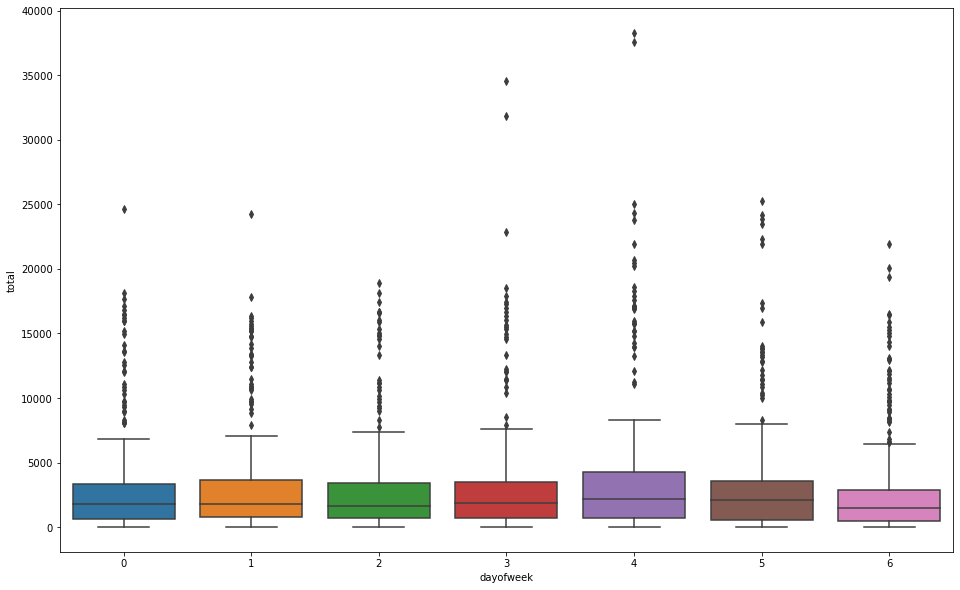

In [23]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.boxplot(x = 'dayofweek', y = 'total', data = dfwifi_weather)

In [24]:
'''
Do we drop the july data? All the 
'''
dfwifi_weather[(dfwifi_weather['location'] != 'Other')]['total'].groupby(dfwifi_weather['dayofweek']).agg(['median', 'mean', 'max', 'min'])


,median,mean,max,min
dayofweek,,,,
0,1744.5,2639.726415,17650.0,0.0
1,1790.0,2858.798780,16365.0,2.0
2,1647.0,2674.307692,18943.0,0.0
3,1862.5,2834.708075,22865.0,0.0
4,2084.5,3392.226708,24322.0,2.0
5,1945.0,2875.314103,25287.0,0.0
6,1210.0,2500.399371,20034.0,0.0


<AxesSubplot:xlabel='rainfall', ylabel='total'>

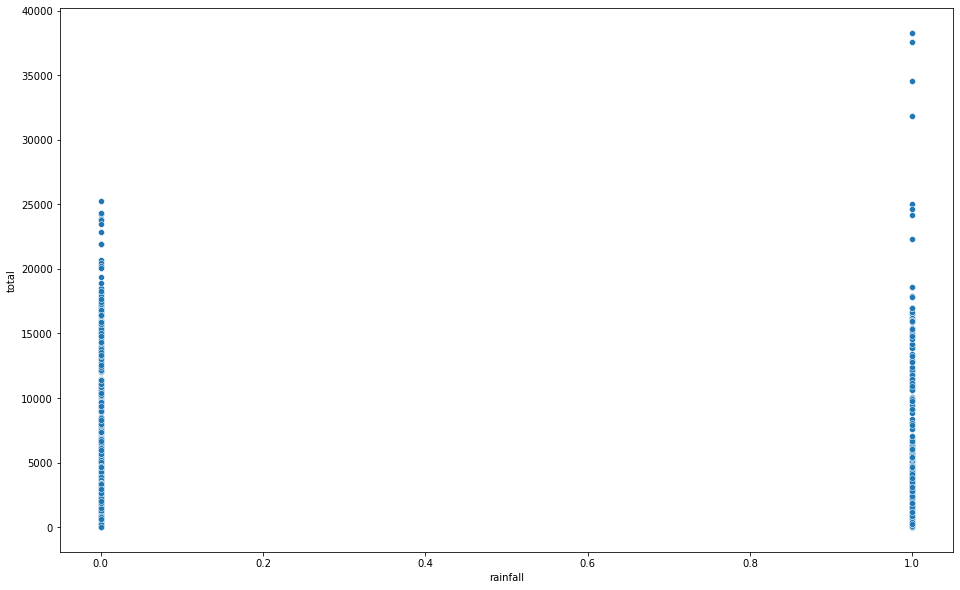

In [25]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x = 'rainfall', y = 'total', data = dfwifi_weather)

<AxesSubplot:xlabel='rainfall', ylabel='total'>

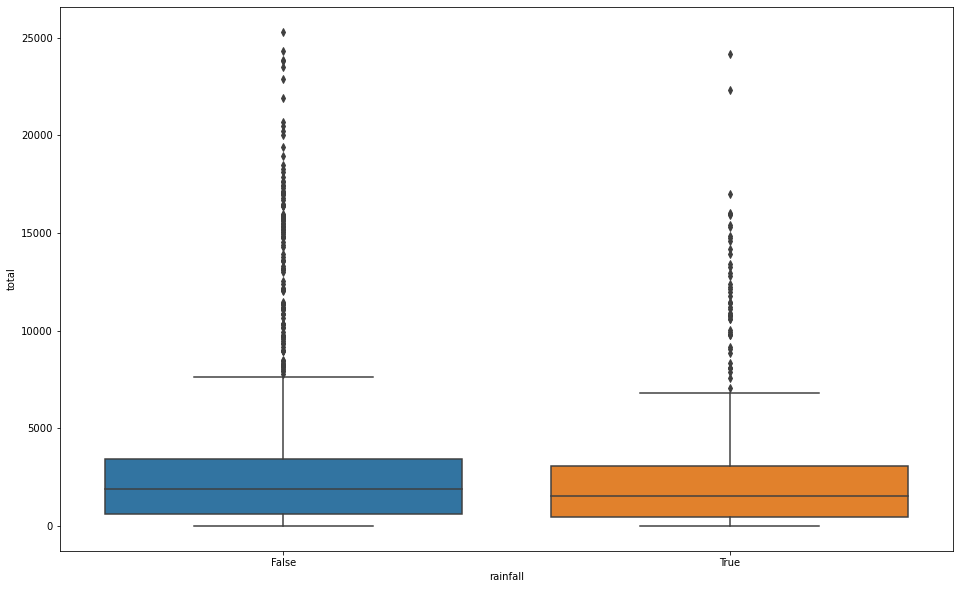

In [52]:
dfwifi_weather_exJuly = dfwifi_weather[(dfwifi_weather['location'] != 'Other')]
#display(dfwifi_weather_exJuly)

fig, ax = plt.subplots(figsize = (16, 10))
sns.boxplot(x = 'rainfall', y = 'total', data = dfwifi_weather_exJuly)

<AxesSubplot:xlabel='dayofweek', ylabel='total'>

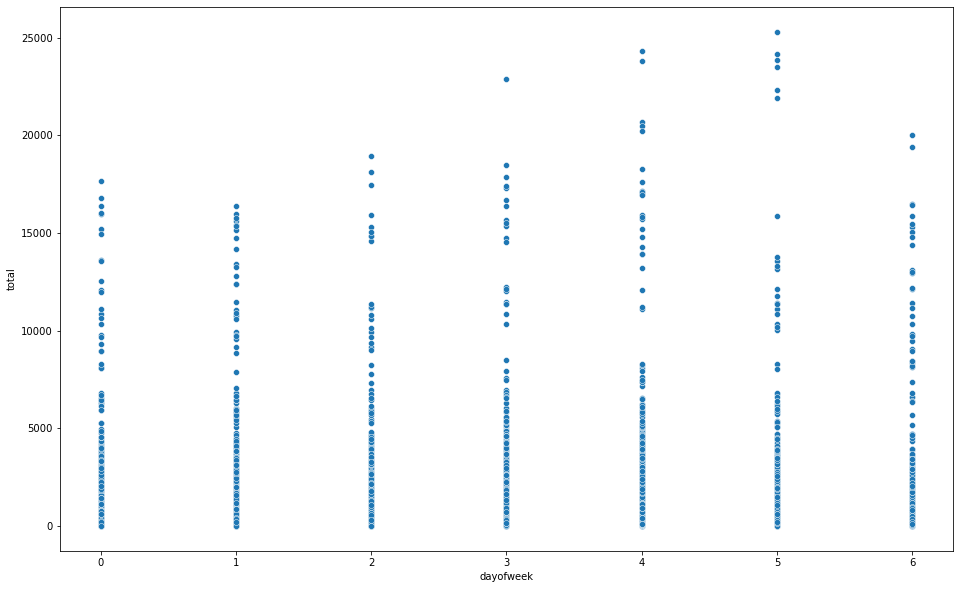

In [27]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x = 'dayofweek', y = 'total', data = dfwifi_weather_exJuly)

,left,left_avg,total,year,month,day,dayofweek,mintemp,maxtemp,rainfall,spd_maxgust,9am_temp,9am_rh,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_ws,3pm_mslp
left,1.000000,0.194585,0.985835,NaN,0.127562,0.023466,-0.044499,0.121182,0.104316,-0.079738,-0.003563,0.135549,-0.124819,0.032015,-0.052438,0.096656,-0.077201,0.044727,-0.039156
left_avg,0.194585,1.000000,0.279985,NaN,-0.562371,-0.084325,0.046873,-0.007816,-0.018727,0.030617,-0.075312,-0.055361,0.143716,-0.120312,0.131976,0.009232,0.033288,-0.146296,0.113052
total,0.985835,0.279985,1.000000,NaN,0.081827,0.012706,-0.035592,0.124015,0.105757,-0.077278,-0.006346,0.134437,-0.118713,0.025451,-0.045254,0.100187,-0.078342,0.036126,-0.032243
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.127562,-0.562371,0.081827,NaN,1.000000,0.020283,-0.006847,-0.041590,-0.035988,-0.027885,0.168723,0.005100,-0.199430,0.245231,-0.185176,-0.077131,-0.043351,0.263019,-0.172130
day,0.023466,-0.084325,0.012706,NaN,0.020283,1.000000,0.001850,0.007624,0.138975,-0.073101,-0.013981,0.126267,-0.066636,-0.002032,-0.052807,0.135265,-0.103225,0.041864,-0.050906
dayofweek,-0.044499,0.046873,-0.035592,NaN,-0.006847,0.001850,1.000000,0.007956,-0.040836,-0.063365,-0.036131,-0.023950,-0.025383,0.030426,0.086933,-0.054349,0.061762,0.001222,0.072152
mintemp,0.121182,-0.007816,0.124015,NaN,-0.041590,0.007624,0.007956,1.000000,0.476247,-0.222126,0.107914,0.775959,-0.258419,0.047261,-0.254177,0.462671,-0.112725,0.086213,-0.220384
maxtemp,0.104316,-0.018727,0.105757,NaN,-0.035988,0.138975,-0.040836,0.476247,1.000000,-0.474690,-0.007592,0.808143,-0.343204,-0.278415,-0.226331,0.966133,-0.618041,-0.095321,-0.367551
rainfall,-0.079738,0.030617,-0.077278,NaN,-0.027885,-0.073101,-0.063365,-0.222126,-0.474690,1.000000,0.254441,-0.421693,0.178196,0.340489,-0.156443,-0.486610,0.285660,0.133185,-0.071092


<AxesSubplot:>

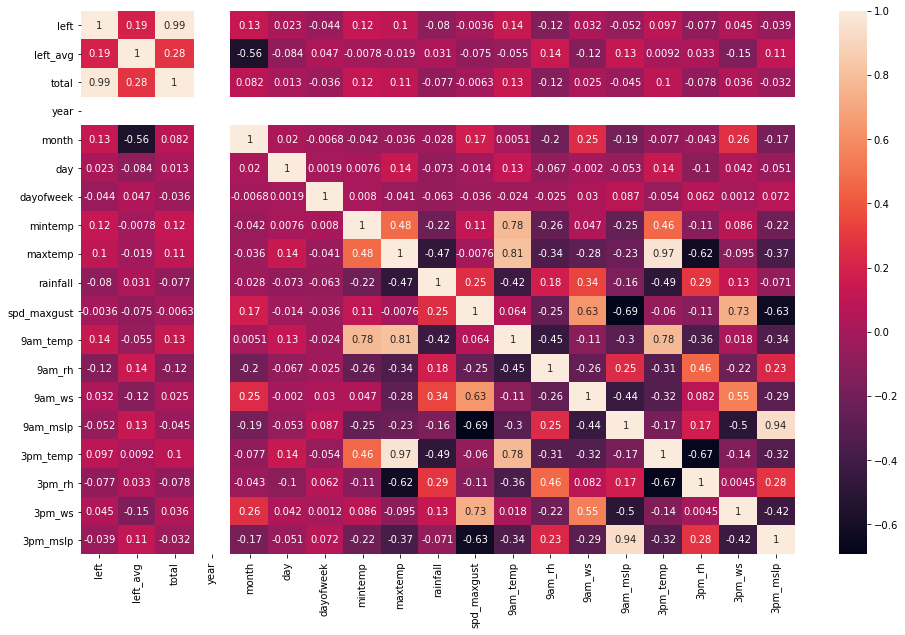

In [28]:
sp_corr = dfwifi_weather_exJuly.corr(method = 'spearman')
display(sp_corr)

fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(sp_corr, annot = True)

In [1]:
'''
With the data in it's current form, there are very few correlations between target variables and potential predictors

notable combinations include:

left_avg with hour, month, 9am_rh, 9am_mslp, 3pm_ws, 3pm, mslp

hour seems to be a good predictor (ish)

perhaps restrict the dataset to hours between 6am and 9pm...


dfwifi_weather_tr = dfwifi_weather_exJuly[(dfwifi_weather_exJuly['hour'].between(5,23))]

sp_corr = dfwifi_weather_tr.corr(method = 'spearman')
display(sp_corr)

fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(sp_corr, annot = True)
'''

"\nWith the data in it's current form, there are very few correlations between target variables and potential predictors\n\nnotable combinations include:\n\nleft_avg with hour, month, 9am_rh, 9am_mslp, 3pm_ws, 3pm, mslp\n\nhour seems to be a good predictor (ish)\n\nperhaps restrict the dataset to hours between 6am and 9pm...\n\n\ndfwifi_weather_tr = dfwifi_weather_exJuly[(dfwifi_weather_exJuly['hour'].between(5,23))]\n\nsp_corr = dfwifi_weather_tr.corr(method = 'spearman')\ndisplay(sp_corr)\n\nfig, ax = plt.subplots(figsize = (16, 10))\nsns.heatmap(sp_corr, annot = True)\n"

In [53]:
'''
Maybe create two model - one on total to predict expected capacity, one on left average to predict movement or flow

potential predictors:

device_id
hour
month
dayofweek
mintemp
maxtemp
rainfall (meh...)
9am_rh

none of these are correlated so hi with each other that multi colinearity would be an issue

potential targets:

total
left_avg

'''

dfwifi_weather_exJuly.columns

dfmodel = dfwifi_weather_exJuly[['date', 'device_id', 'left', 'left_avg', 'total', 'month', 'day', 'dayofweek', 'mintemp', 'maxtemp', 'rainfall']]
dfmodel.head()
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2467
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2232 non-null   datetime64[ns]
 1   device_id  2232 non-null   object        
 2   left       2232 non-null   float64       
 3   left_avg   2232 non-null   float64       
 4   total      2232 non-null   float64       
 5   month      2232 non-null   int64         
 6   day        2232 non-null   int64         
 7   dayofweek  2232 non-null   int64         
 8   mintemp    2232 non-null   float64       
 9   maxtemp    2232 non-null   float64       
 10  rainfall   2232 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 258.5+ KB


In [31]:
print(len(dfmodel.device_id.unique()))

21


In [32]:
dfmodel.columns

Index(['date', 'device_id', 'left', 'left_avg', 'total', 'month', 'day',
       'dayofweek', 'mintemp', 'maxtemp', 'rainfall'],
      dtype='object')

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder

'''
using onehotencoding for the day of the week and device_id
'''
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

'''
Customising onehotencoder idea comes from here if anyone is interested in reusing:

https://towardsdatascience.com/how-to-assign-labels-with-sklearn-one-hot-encoder-e59a5f17df4f
'''
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_<{self.categories_[i][j]}>')
                j += 1
        return new_columns

encoder = OneHotEncoder(handle_unknown='ignore')
encoded = pd.DataFrame(encoder.fit_transform(dfmodel[['dayofweek', 'device_id']]))

dfmodel = dfmodel.join(encoded)
dfmodel.head()

,date,device_id,left,left_avg,total,month,day,dayofweek,mintemp,maxtemp,...,device_id_<hawk-013a20>,device_id_<hawk-013a21>,device_id_<hawk-013a22>,device_id_<hawk-013a23>,device_id_<hawk-013a2c>,device_id_<hawk-013a2e>,device_id_<hawk-013a31>,device_id_<hawk-013a33>,device_id_<hawk-013a4f>,device_id_<hawk-013a51>
0,2019-01-01,hawk-013a4f,926.0,1.373494,1615.0,1,1,1,11.5,25.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2019-01-01,hawk-013a23,1081.0,1.168675,1749.0,1,1,1,11.5,25.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-01,hawk-013a51,579.0,1.100000,1000.0,1,1,1,11.5,25.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2019-01-02,hawk-013a4f,1584.0,1.248120,2992.0,1,2,2,15.0,22.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2019-01-02,hawk-013a23,1728.0,1.120301,2796.0,1,2,2,15.0,22.7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
joblib.dump(encoder, 'encoder.dump')

['encoder.dump']

In [28]:
'''
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = pd.DataFrame(encoder.fit_transform(dfmodel[['device_id']]))


dfmodel = dfmodel.join(encoded)
dfmodel.head()
'''

"\nencoder = OneHotEncoder(handle_unknown='ignore')\nencoded = pd.DataFrame(encoder.fit_transform(dfmodel[['device_id']]))\n\n\ndfmodel = dfmodel.join(encoded)\ndfmodel.head()\n"

In [55]:
dfdata = dfmodel.drop(['date', 'device_id', 'day', 'dayofweek', ], axis = 1)
dfdata.head()

,left,left_avg,total,month,mintemp,maxtemp,rainfall,dayofweek_<0>,dayofweek_<1>,dayofweek_<2>,...,device_id_<hawk-013a20>,device_id_<hawk-013a21>,device_id_<hawk-013a22>,device_id_<hawk-013a23>,device_id_<hawk-013a2c>,device_id_<hawk-013a2e>,device_id_<hawk-013a31>,device_id_<hawk-013a33>,device_id_<hawk-013a4f>,device_id_<hawk-013a51>
0,926.0,1.373494,1615.0,1,11.5,25.2,False,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1081.0,1.168675,1749.0,1,11.5,25.2,False,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,579.0,1.100000,1000.0,1,11.5,25.2,False,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1584.0,1.248120,2992.0,1,15.0,22.7,False,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1728.0,1.120301,2796.0,1,15.0,22.7,False,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
dfmodel[dfmodel.isnull().any(axis = 1)]

,date,device_id,left,left_avg,total,month,day,dayofweek,mintemp,maxtemp,...,device_id_<hawk-013a20>,device_id_<hawk-013a21>,device_id_<hawk-013a22>,device_id_<hawk-013a23>,device_id_<hawk-013a2c>,device_id_<hawk-013a2e>,device_id_<hawk-013a31>,device_id_<hawk-013a33>,device_id_<hawk-013a4f>,device_id_<hawk-013a51>


In [56]:
dftargets = dfdata[['total', 'left', 'left_avg']]
display(dftargets.head())

dfpredictors = dfdata.drop(['total', 'left', 'left_avg'], axis = 1)
display(dfpredictors.head())

,total,left,left_avg
0,1615.0,926.0,1.373494
1,1749.0,1081.0,1.168675
2,1000.0,579.0,1.100000
3,2992.0,1584.0,1.248120
4,2796.0,1728.0,1.120301


,month,mintemp,maxtemp,rainfall,dayofweek_<0>,dayofweek_<1>,dayofweek_<2>,dayofweek_<3>,dayofweek_<4>,dayofweek_<5>,...,device_id_<hawk-013a20>,device_id_<hawk-013a21>,device_id_<hawk-013a22>,device_id_<hawk-013a23>,device_id_<hawk-013a2c>,device_id_<hawk-013a2e>,device_id_<hawk-013a31>,device_id_<hawk-013a33>,device_id_<hawk-013a4f>,device_id_<hawk-013a51>
0,1,11.5,25.2,False,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,11.5,25.2,False,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,11.5,25.2,False,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,15.0,22.7,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,15.0,22.7,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
display(dfpredictors.info())
display(dftargets.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2467
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    2232 non-null   int64  
 1   mintemp                  2232 non-null   float64
 2   maxtemp                  2232 non-null   float64
 3   rainfall                 2232 non-null   bool   
 4   dayofweek_<0>            2232 non-null   float64
 5   dayofweek_<1>            2232 non-null   float64
 6   dayofweek_<2>            2232 non-null   float64
 7   dayofweek_<3>            2232 non-null   float64
 8   dayofweek_<4>            2232 non-null   float64
 9   dayofweek_<5>            2232 non-null   float64
 10  dayofweek_<6>            2232 non-null   float64
 11  device_id_<014d98>       2232 non-null   float64
 12  device_id_<014d9a>       2232 non-null   float64
 13  device_id_<014d9e>       2232 non-null   float64
 14  device_id_<014daa>      

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2467
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   total     2232 non-null   float64
 1   left      2232 non-null   float64
 2   left_avg  2232 non-null   float64
dtypes: float64(3)
memory usage: 134.3 KB


None

In [57]:
X_train, X_test, y_train, y_test = train_test_split(dfpredictors, dftargets['total'], test_size=0.2, random_state=0)

In [58]:
'''
running a model on total first
'''
from sklearn.model_selection import GridSearchCV


params = {'bootstrap': [True],'max_features': ['auto', 'sqrt'],'min_samples_leaf': range(1,11),'min_samples_split': range(2,21,2),'n_estimators': range(100,501,50)}

rf_reg = RandomForestRegressor()

rf_gs = GridSearchCV(rf_reg, params, cv = 2, scoring= 'neg_root_mean_squared_error', return_train_score = True, verbose = 3, n_jobs = -1)
rf_gs.fit(X_train, y_train)

#rf_reg = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 200)
#rf_reg.fit(X_train, y_train)
print(rf_gs.best_estimator_)
y_pred = rf_gs.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Fitting 2 folds for each of 1800 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  3.6min finished


RandomForestRegressor(min_samples_leaf=2, min_samples_split=8, n_estimators=350)
MAE: 789.8481410373221
MSE: 1926131.373337489
RMSE: 1387.8513513116197
R^2: 0.8581333816502688


In [59]:
import joblib
joblib.dump(rf_gs.best_estimator_, 'rf_model_1.dump')

['rf_model_1.dump']

In [86]:
'''trying and svm regressor'''
from sklearn import svm
svm_reg = svm.SVR()

params = {'C': np.logspace(-1, 2, 20), 'gamma': [1,0.1,0.01, 0.01],'kernel': ['rbf', 'sigmoid']}
svm_gs = GridSearchCV(svm_reg, params, cv = 3, scoring= 'neg_root_mean_squared_error', return_train_score = True, verbose = 3, n_jobs = -1)
svm_gs.fit(X_Strain, y_train)

print(svm_gs.best_estimator_)
y_pred = svm_gs.predict(X_Stest)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.1s


SVR(C=100.0, gamma=0.1)
MAE: 1741.5792542080014
MSE: 12550098.505763886
RMSE: 3542.611819796785
R^2: 0.07563935689199963


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    6.1s finished


In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
        ('col_trans', StandardScaler(), ['month', 'mintemp', 'maxtemp'])
    ], remainder='passthrough')

ct.fit(X_train)

X_Strain = ct.transform(X_train)
X_Stest = ct.transform(X_test)

In [93]:
joblib.dump(ct, 'transformer.dump')

['transformer.dump']

In [84]:
'''
lets play the neural net game with sklearn...
'''

from sklearn.neural_network import MLPRegressor

params = {"hidden_layer_sizes": range(50,301,50), "activation": ["logistic"], "solver": ["adam"], "alpha": np.logspace(-1, 1, 10)}

mlp_reg = MLPRegressor(max_iter=30000)
mlp_gs = GridSearchCV(mlp_reg, params, cv = 2, scoring= 'neg_root_mean_squared_error', return_train_score = True, verbose = 3, n_jobs = -1)
mlp_gs.fit(X_Strain, y_train)

print(mlp_gs.best_estimator_)
print(mlp_gs.best_params_)
y_pred = mlp_gs.predict(X_Stest)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 65.8min finished


MLPRegressor(activation='logistic', alpha=10.0, hidden_layer_sizes=300,
             max_iter=30000)
{'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': 300, 'solver': 'adam'}
MAE: 881.5730136506046
MSE: 2157699.561237763
RMSE: 1468.91101202141
R^2: 0.8410775379058915


C:\Users\paulh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
print(mlp_gs.best_params_)

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 50, 'solver': 'adam'}
